In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-players-stats2023-season/2023_nba_player_stats.csv


# DataSet Overview


In [2]:
#### Import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as make_subplots


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

#### 

In [3]:
df = pd.read_csv('/kaggle/input/nba-players-stats2023-season/2023_nba_player_stats.csv')
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [4]:
df.shape

(539, 30)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64

In [7]:
df.rename(columns={
    'PName': 'Player_Name',
    'POS': 'Position',
    'Team': 'Team_Abbreviation',
    'Age': 'Age',
    'GP': 'Games_Played',
    'W': 'Wins',
    'L': 'Losses',
    'Min': 'Minutes_Played',
    'PTS': 'Total_Points',
    'FGM': 'Field_Goals_Made',
    'FGA': 'Field_Goals_Attempted',
    'FG%': 'Field_Goal_Percentage',
    '3PM': 'Three_Point_FG_Made',
    '3PA': 'Three_Point_FG_Attempted',
    '3P%': 'Three_Point_FG_Percentage',
    'FTM': 'Free_Throws_Made',
    'FTA': 'Free_Throws_Attempted',
    'FT%': 'Free_Throw_Percentage',
    'OREB': 'Offensive_Rebounds',
    'DREB': 'Defensive_Rebounds',
    'REB': 'Total_Rebounds',
    'AST': 'Assists',
    'TOV': 'Turnovers',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'PF': 'Personal_Fouls',
    'FP': 'NBA_Fantasy_Points',
    'DD2': 'Double_Doubles',
    'TD3': 'Triple_Doubles',
    '+/-': 'Plus_Minus'
}, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player_Name                539 non-null    object 
 1   Position                   534 non-null    object 
 2   Team_Abbreviation          539 non-null    object 
 3   Age                        539 non-null    int64  
 4   Games_Played               539 non-null    int64  
 5   Wins                       539 non-null    int64  
 6   Losses                     539 non-null    int64  
 7   Minutes_Played             539 non-null    float64
 8   Total_Points               539 non-null    int64  
 9   Field_Goals_Made           539 non-null    int64  
 10  Field_Goals_Attempted      539 non-null    int64  
 11  Field_Goal_Percentage      539 non-null    float64
 12  Three_Point_FG_Made        539 non-null    int64  
 13  Three_Point_FG_Attempted   539 non-null    int64  

In [8]:
df.describe(include = np.number)

,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,Field_Goals_Attempted,Field_Goal_Percentage,Three_Point_FG_Made,...,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


In [9]:
df.describe(include = 'object')

,Player_Name,Position,Team_Abbreviation
count,539,534,539
unique,539,7,30
top,Jayson Tatum,SG,DAL
freq,1,96,21


In [10]:
df.fillna({'Position':'SG'}, inplace = True)

# Data Visualization

In [11]:
px.histogram(df, x = 'Position', color_discrete_sequence=px.colors.qualitative.Vivid, title = 'Players position value counts', template='plotly_dark')

In [12]:
position_stats = df.groupby(['Position']).agg({'Total_Points': 'mean'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
    x = position_stats['Position'],
    y = position_stats['Total_Points'],
    marker = dict(
        color = ['orangered', 'white', 'grey', 'orangered', 'white', 'grey', 'orangered']
        )
    ))

fig.update_layout(
    title = 'Points per Position',
    xaxis_title = 'Position',
    yaxis_title = 'Average Total Points',
    template = 'plotly_dark'
)

fig.show()

In [13]:
fig_age_histogram = go.Figure()

fig_age_histogram.add_trace(
    go.Histogram(
        x = df['Age'],
        marker_color = 'orangered'
    )
)

fig_age_histogram.update_layout(
    title = 'Distribution of Player Age',
    xaxis_title = 'Age',
    yaxis_title = 'Count',
    template = 'plotly_dark'
)

fig_age_histogram.show()

In [14]:
fig_total_points = px.scatter(
    df,
    x = 'Age',
    y = 'Total_Points',
    color = 'Position',
    title = 'Player Age vs Total Points',
    labels = {'Age': 'Age', 'Total_Points': 'Total_Points'},
    template = 'plotly_dark'
)

fig_total_points.show()

fig_fg_percentage = px.scatter(
    df,
    x = 'Age',
    y = 'Field_Goal_Percentage',
    color = 'Position',
    title = 'Player Age vs Field Goal Percentage',
    labels = {'Age': 'Age', 'Field_Goal_Percentage': 'Field Goal Percentage'},
    template = 'plotly_dark'
)

fig_fg_percentage.show()


fig_assists = px.scatter(
    df,
    x = 'Age',
    y = 'Assists',
    color = 'Position',
    title = 'Age vs Assists',
    labels = {'Age': 'Age', 'Assists': 'Assists'},
    template = 'plotly_dark'
)
fig_assists.show()

In [15]:
avg_fantasy_points = df.groupby('Position')['NBA_Fantasy_Points'].mean().reset_index()

fig_fantasy_points = go.Figure()

fig_fantasy_points.add_trace(
    go.Bar(
        x = avg_fantasy_points['Position'],
        y = avg_fantasy_points['NBA_Fantasy_Points'],
        marker_color = 'orangered'
    )
)

fig_fantasy_points.update_layout(
    title = 'Average Fantasy Points by Position',
    xaxis_title = 'Position',
    yaxis_title = 'Average Fantasy Points',
    template = 'plotly_dark'
)

fig_fantasy_points.show()

In [16]:
double_doubles_by_position = df.groupby('Position')['Double_Doubles'].mean().reset_index()
triple_doubles_by_position = df.groupby('Position')['Triple_Doubles'].mean().reset_index()

fig_double_doubles = go.Figure()

fig_double_doubles.add_trace(
    go.Bar(
        x = double_doubles_by_position['Position'],
        y = double_doubles_by_position['Double_Doubles'],
        name = 'Double Doubles',
        marker_color = 'orangered'
    )
)

fig_double_doubles.update_layout(
    title = 'Number of Double Doubles by Position',
    xaxis_title = 'Position',
    yaxis_title = 'Number of Double Doubles',
    template = 'plotly_dark'
)

fig_triple_doubles = go.Figure()

fig_triple_doubles.add_trace(
    go.Bar(
        x = triple_doubles_by_position['Position'],
        y = triple_doubles_by_position['Triple_Doubles'],
        name = 'Triple Doubles',
        marker_color = 'white'
    )
)

fig_triple_doubles.update_layout(
    title = 'Number of Triple Doubles by Position',
    xaxis_title = 'Position',
    yaxis_title = 'Number of Triple Doubles',
    template = 'plotly_dark'
)

fig_double_doubles.show()
fig_triple_doubles.show()

In [17]:
fig_points_minutes_scatter = go.Figure()

fig_points_minutes_scatter.add_trace(
    go.Scatter(
        x = df['Minutes_Played'],
        y = df['Total_Points'],
        mode = 'markers',
        marker_color = 'orangered',
        opacity = 0.7
    )
)

fig_points_minutes_scatter.update_layout(
    title = 'Points vs Minutes Played',
    xaxis_title = 'Minutes Played',
    yaxis_title = 'Total Points',
    template = 'plotly_dark'
)

fig_points_minutes_scatter.show()

In [18]:
radar_columns = ['Total_Points', 'Total_Rebounds', 'Assists', 'Steals', 'Blocks']

selected_players = df.sample(n = 5)
fig_radar = go.Figure()

for index , player in selected_players.iterrows():
    fig_radar.add_trace(
        go.Scatterpolar(
            r =  [player[column] for column in radar_columns],
            theta = radar_columns,
            fill  = 'toself',
            name = player['Player_Name']
        )
    )
    
fig_radar.update_layout(
    title = 'Player Comparison - Overall Performance',
    template = 'plotly_dark',
    polar = dict(
        radialaxis = dict(
            visible = True,
            range = [0, 2000]
        )
    )
)

fig_radar.show()

In [19]:
fig_scatter = px.scatter(
    df,
    x = 'Total_Rebounds',
    y = 'Total_Points',
    title = 'Total Points vs Total Rebounds',
    labels = {'Total_Rebounds': 'Total Rebounds', 'Total_Points' : 'Total Points'},
    template = 'plotly_dark',
    color_discrete_sequence = ['orangered']
)


fig_scatter.show()

In [20]:
px.histogram(
    df,
    x = 'Team_Abbreviation',
    color_discrete_sequence = px.colors.qualitative.Vivid,
    title = 'Players teams counts',
    template = 'plotly_dark'
)

In [21]:
team_stats = df.groupby(['Team_Abbreviation']).agg({'Wins': 'mean', 'Losses': 'mean'}).reset_index()

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = team_stats['Team_Abbreviation'],
        y = team_stats['Wins'],
        name = 'Wins',
        marker_color = 'Green'
    )
)

fig.add_trace(
    go.Bar(
        x = team_stats['Team_Abbreviation'],
        y = team_stats['Losses'],
        name = 'Losses',
        marker_color = 'red'
    )
)

fig.update_layout(
    title = 'Average Team Losses and Wins',
    xaxis_title = 'Team Abbreviation',
    yaxis_title = 'Average Count',
    barmode = 'group',
    bargap = 0.5,
    bargroupgap = 0.1,
    height = 500,
    width = 950,
    template = 'plotly_dark'
)

fig.show()

In [22]:
team_stats = df.groupby(['Team_Abbreviation']).mean(numeric_only = True).reset_index()

fig = px.bar(
    team_stats,
    x = 'Team_Abbreviation',
    y = 'Total_Points',
    title = 'Average Total Points by Team',
    color = 'Team_Abbreviation',
    template = 'plotly_dark'
)
fig.show()

fig = px.bar(
    team_stats,
    x = 'Team_Abbreviation',
    y = 'Field_Goal_Percentage',
    title = 'Average Field Goal Percentage by Team',
    color = 'Team_Abbreviation',
    template = 'plotly_dark'
)
fig.show()

fig = px.bar(
    team_stats,
    x = 'Team_Abbreviation',
    y = 'Free_Throw_Percentage',
    title = 'Average Free Throw Percentage by Team',
    color = 'Team_Abbreviation',
    template = 'plotly_dark'
)
fig.show()

fig = px.bar(
    team_stats,
    x = 'Team_Abbreviation',
    y = 'Total_Rebounds',
    title = 'Average Total Rebounds by Team',
    color = 'Team_Abbreviation',
    template = 'plotly_dark'
)
fig.show()

fig = px.bar(
    team_stats,
    x = 'Team_Abbreviation',
    y = 'Assists',
    title = 'Average Assists by Team',
    color = 'Team_Abbreviation',
    template = 'plotly_dark'
)
fig.show()

In [23]:
relationships = [
    ('Age', 'Total_Points'),
    ('Total_Points', 'Games_Played'),
    ('Field_Goals_Attempted', 'Field_Goals_Made'),
    ('Three_Point_FG_Made', 'Three_Point_FG_Attempted'),
    ('Free_Throws_Made', 'Free_Throws_Attempted'),
    ('Offensive_Rebounds', 'Defensive_Rebounds'),
    ('Steals', 'Blocks'),
    ('Personal_Fouls', 'Blocks'),
    ('Assists', 'Total_Points')
]

fig = make_subplots.make_subplots(rows=3, cols=3)

for idx, (x_col, y_col) in enumerate(relationships, start = 1):
    row = (idx - 1) // 3 + 1
    col = (idx - 1) % 3 + 1
    
    fig.add_trace(
        go.Scatter(
            x = df[x_col],
            y = df[y_col],
            mode = 'markers' if idx != 3 else 'lines',
            
        ),
        row = row,
        col = col
    )
    
    fig.update_xaxes(title = x_col, row = row, col = col)
    fig.update_yaxes(title = y_col, row = row, col = col)
    
fig.update_layout(
    title_text = 'RelationShips between different Columns',
    height = 800,
    width = 1000,
    template = 'plotly_dark',
    showlegend = False
)

fig.update_annotations(
    dict(
        text = '',
        showarrow = False
    )
)

fig.show()

In [24]:
df['Defensive_Performance'] = df['Blocks'] + df['Steals']
best_defending_players = df.sort_values(by = 'Defensive_Performance', ascending = False).head(10)

fig_defending = go.Figure()
fig_defending.add_trace(
    go.Bar(
        x = best_defending_players['Player_Name'],
        y = best_defending_players['Defensive_Performance'],
        marker_color = 'white'
    )
)

fig_defending.update_layout(
    title = 'Top 10 Best Defending Players',
    xaxis_title = 'Player Name',
    yaxis_title = 'Defensive Performance (Combined Blocks and Steals)',
    height = 500,
    width = 1000,
    template = 'plotly_dark'
)

In [25]:
best_attacking_playes = df.sort_values(by = 'Total_Points', ascending = False).head(10)

fig_attacking = go.Figure()
fig_attacking.add_trace(
    go.Bar(
        x = best_attacking_playes['Player_Name'],
        y = best_attacking_playes['Total_Points'],
        marker_color = 'orangered'
    )
)

fig_attacking.update_layout(
    title = 'Top 10 Best Attacking Players',
    xaxis_title = 'Player Name',
    yaxis_title = 'Total Points',
    height = 500,
    width = 1000,
    template = 'plotly_dark'
)

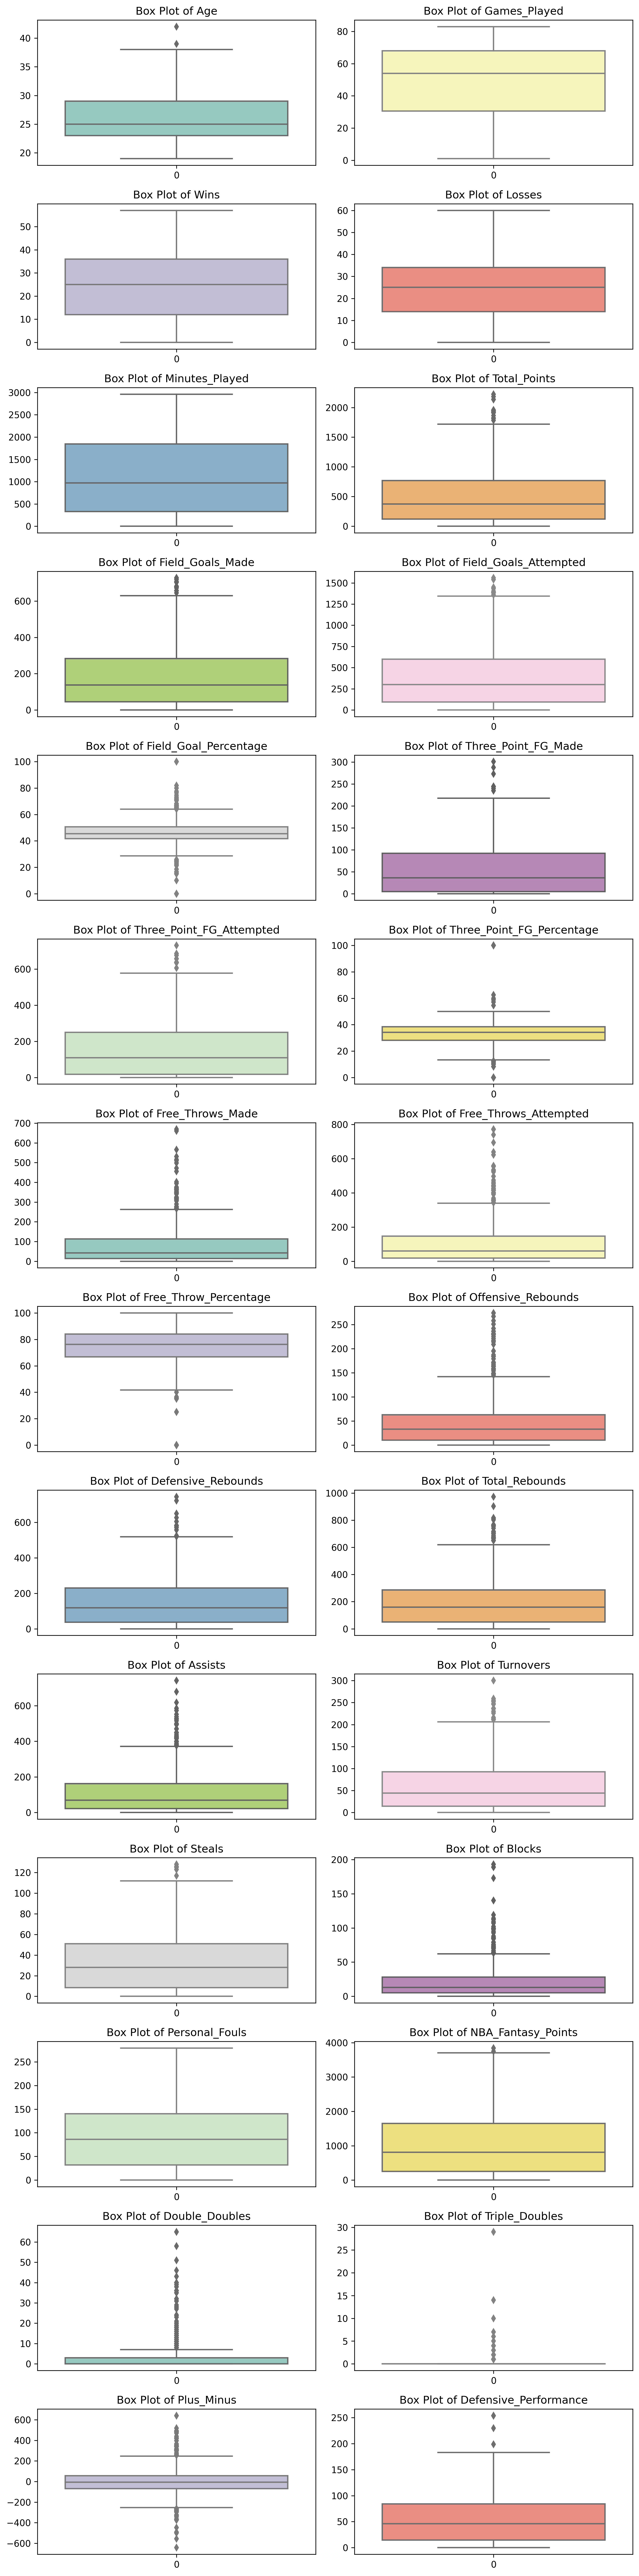

In [26]:
columns_to_exclude = ['Player_Name', 'Position', 'Team_Abbreviation']

all_colunms = df.columns

columns = all_colunms.drop(columns_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize = (10, 40), dpi = 300)

colors = sns.color_palette("Set3", num_columns)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(
        data = df[column],
        ax = axes[row, col],
        color = colors[i]
    )
    axes[row, col].set_title(f'Box Plot of {column}')
    
if num_columns % 2 != 0:
    axes[-1, -1].axis('off')
    
plt.tight_layout()
plt.show()

#### removing outliers

In [27]:
outliers_conditions = (
    (df['Field_Goal_Percentage'] > 90) | 
    (df['Field_Goal_Percentage'] == 0) |
    (df['Three_Point_FG_Percentage'] > 90) |
    (df['Three_Point_FG_Percentage'] == 0) |
    (df['Free_Throw_Percentage'] == 0)
)

df = df[~outliers_conditions]

correlation_matrix = df.corr(numeric_only = True)

fig = go.Figure(
    data = go.Heatmap(
        z = correlation_matrix.values,
        x = correlation_matrix.columns,
        y = correlation_matrix.index,
        colorscale = 'Oranges'
    )
)

fig.update_layout(
    title = 'Correlation HeatMap',
    xaxis_title = 'Features',
    yaxis_title = 'Features',
    height = 1000,
    template = 'plotly_dark'
)

fig.show()

#### Features

dropping columns based n high correlation oserved in heatmap


In [28]:
df.drop(
    columns = [
        'Player_Name', 'Position', 'Team_Abbreviation', 'Field_Goals_Made',
        'Field_Goals_Attempted', 'Three_Point_FG_Made', 'Three_Point_FG_Attempted',
        'Three_Point_FG_Percentage', 'NBA_Fantasy_Points', 'Double_Doubles', 'Free_Throws_Attempted',
        'Triple_Doubles', 'Offensive_Rebounds', 'Defensive_Rebounds'
    ], 
    inplace = True
)

In [29]:
# Spliting dataset

X = df.drop('Total_Points', axis = 1)
y = df['Total_Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=  0.2, random_state = 42)

row  , col = X_train.shape
print("X_train have ", row , " rows and " ,col, "columns")
row, col = X_test.shape
print("X_test have ", row, " rows and ", col, " columns")

X_train have  376  rows and  16 columns
X_test have  94  rows and  16  columns


# Modeling

## Linear Regression



In [30]:
model = LinearRegression()

# le = preprocessing.LabelEncoder()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(
            df.drop('Total_Points', axis = 1)
            , df['Total_Points']
            , test_size = test_size
            , random_state = random_state
        )
        model_fit = model.fit(X_train, y_train)
        y_pred = model_fit.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            
    
print(f"Best test size : {best_test_size}")
print(f"Best random state : {best_random_state}")
print(f"Best R2 Score : {best_r2_score}")

Best test size : 0.2
Best random state : 43
Best R2 Score : 0.9733468636997125


### Linear Regression Model Training and Evaluation

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis = 1), df['Total_Points'], test_size = .2, random_state = 43)

LRmodel = LinearRegression(fit_intercept = True)
LRmodel.fit(X_train, y_train)

y_pred = LRmodel.predict(X_test)
r2_score(y_test, y_pred)

0.9733468636997125

## K-Nearest Neighbors (KNN)

In [32]:
model = KNeighborsRegressor()

test_size = [ 0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(
            df.drop('Total_Points', axis = 1)
            , df['Total_Points']
            , test_size = test_size
            , random_state = random_state
        )
        model_fit = model.fit(X_train, y_train)
        y_pred = model_fit.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            
    
print(f"Best test size : {best_test_size}")
print(f"Best random state : {best_random_state}")
print(f"Best R2 Score : {best_r2_score}")

Best test size : 0.2
Best random state : 0
Best R2 Score : 0.9300477855230884


#### Hyperparameter Tunning for KNN

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis = 1), df['Total_Points'], test_size = 0.2, random_state = 0)

KNNmodel = KNeighborsRegressor()

param_grid = {
    'n_neighbors' : range(3, 11, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator = KNNmodel, param_grid = param_grid, scoring = 'r2', cv = 5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set : {test_r2}")

Best R2 score: 0.906935512772673
Best hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
R2 score on test set : 0.920640559342445


## DecisionTree Regressor

#### Test size tuning for Decision Tree Regressor

In [34]:
model = DecisionTreeRegressor()

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_state = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(
            df.drop('Total_Points', axis = 1)
            , df['Total_Points']
            , test_size = test_size
            , random_state = random_state
        )
        model_fit = model.fit(X_train, y_train)
        y_pred = model_fit.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            
    
print(f"Best test size : {best_test_size}")
print(f"Best random state : {best_random_state}")
print(f"Best R2 Score : {best_r2_score}")

Best test size : 0.2
Best random state : 42
Best R2 Score : 0.9438644330229496


#### HYperparameter Tuning for Decision Tree Regressor

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis = 1), df['Total_Points'], test_size = 0.15, random_state = 100)

DTRmodel = DecisionTreeRegressor()
cv_scores = cross_val_score(DTRmodel, X_train, y_train, cv = 5, scoring = 'r2')

param_grid = {
    'max_depth' : [None, 5, 10, 15, 20],
    'min_samples_split' : [15, 20, 25, 30, 35],
    'min_samples_leaf' : [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator = DTRmodel, param_grid=param_grid, scoring = 'r2', cv = 5)

grid_search.fit(X_train, y_train)


best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set : {test_r2}")

Best R2 score: 0.9132578424548716
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15}
R2 score on test set : 0.955071689661187


## RandomForest Regressor

#### Random Forest Regressor Hyperparameter Tuning

In [36]:
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(
            df.drop('Total_Points', axis = 1)
            , df['Total_Points']
            , test_size = test_size
            , random_state = random_state
        )
        model = RandomForestRegressor(n_estimators = 100, max_depth = 5)
        model_fit = model.fit(X_train, y_train)
        y_pred = model_fit.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            
    
print(f"Best test size : {best_test_size}")
print(f"Best random state : {best_random_state}")
print(f"Best R2 Score : {best_r2_score}")

Best test size : 0.1
Best random state : 0
Best R2 Score : 0.9724986077963693


#### Test size tuning for RandomForest Regressor

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis = 1), df['Total_Points'], test_size = 0.1, random_state = 0)

RFmodel = RandomForestRegressor()

param_grid = {
    'n_estimators' : range(80 , 160, 10),
    'max_depth': range(1, 20, 2)
}

grid_search = GridSearchCV(estimator = RFmodel, param_grid = param_grid, scoring='r2', cv = 5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set : {test_r2}")

Best R2 score: 0.9479081943337999
Best hyperparameters: {'max_depth': 19, 'n_estimators': 80}
R2 score on test set : 0.9693333588917827


In [38]:
y_final = best_model.predict(X)

comparison_df = pd.DataFrame({'Actual' : y, 'Predicted': y_final})

fig_scatter = px.scatter(
    comparison_df, 
    x = 'Actual', 
    y = 'Predicted', 
    color = 'Actual',
    template = 'plotly_dark',
    title = 'Comaprison of Actual vs Predicted',
    labels = {
        'Actual': 'Actual Points', 
        'Predicted' : 'Predicted Points'}
)

fig_hist = px.histogram(
    comparison_df,
    x = ['Actual', 'Predicted'],
    nbins = 30, 
    barmode = 'overlay',
    template = 'plotly_dark',
    title = 'Distribution of Actual and Predicted Points',
    labels = {
        'value': 'Points',
        'variable': 'Values'
    },
    color_discrete_sequence = ['#185ADB', '#FC5C9C']
)

residuals = y - y_final
fig_residual = go.Figure(
    data = go.Scatter(
        x = y_final,
        y = residuals,
        mode = 'markers',
        marker = dict(
            color = 'orangered'
        ),
        showlegend = False
    )
)

fig_residual.add_shape(
    go.layout.Shape(
        type = 'line',
        x0 = min(y_final),
        x1 = max(y_final),
        y0 = 0, 
        y1 = 0,
        line = dict(color = 'orange', dash = 'dash')
    )
)
fig_residual.update_layout(
    template = 'plotly_dark',
    title = 'Residual Plot',
    xaxis_title = 'Predicted Values',
    yaxis_title = 'Residuals'
)

fig_line = go.Figure()
fig_line.add_trace(
    go.Scatter(
        x = y,
        y = y,
        mode= 'lines',
        line = dict(color = '#98DFD6'),
        name = 'Ideal Line'
    )
)
fig_line.add_trace(
    go.Scatter(
        x = y,
        y = y_final,
        mode = 'markers',
        marker = dict(color = 'orangered'),
        name = 'Predicted Values'
    )
)
fig_line.add_trace(
    go.Scatter(
        x = np.unique(y),
        y  = np.polynomial.Polynomial(np.polyfit(y, y_final, 1))(np.unique(y)),
        mode = 'lines',
        line = dict(color = '#FFDD83'),
        name = 'Regression Line'
    )
)
fig_line.update_layout(
    template = 'plotly_dark',
    title = 'Predicted vs True line plot',
    xaxis_title = 'True Values',
    yaxis_title = 'Predicted Values'
)

fig_scatter.show()
fig_hist.show()
fig_residual.show()
fig_line.show()